In [1]:
# step 1: import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# step 2: Load the dataset
df = pd.read_csv('heart_disease_uci.csv')

# Display the first 5 rows and last 5 rows
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
# Display the last 5 rows
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [4]:
df.shape

(920, 16)

In [5]:
# Check structure, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [7]:
print(df['num'].value_counts())

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [8]:
# Rename 'num' to 'target' and binarize
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Drop the original 'num' column
df.drop('num', axis=1, inplace=True)

# Confirming the output
print(df['target'].value_counts())
df.head()

target
1    509
0    411
Name: count, dtype: int64


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
# Drop the 'id' column since it is irrelevant
df.drop('id', axis=1, inplace=True)
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [10]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

In [11]:
df.head()

,age,sex,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,Male,Cleveland,145.0,233.0,True,150.0,False,2.3,0.0,0,False,False,True,False,False,False,False,False,False
1,67,Male,Cleveland,160.0,286.0,False,108.0,True,1.5,3.0,1,False,False,False,False,False,True,False,True,False
2,67,Male,Cleveland,120.0,229.0,False,129.0,True,2.6,2.0,1,False,False,False,False,False,True,False,False,True
3,37,Male,Cleveland,130.0,250.0,False,187.0,False,3.5,0.0,0,False,True,False,True,False,False,False,True,False
4,41,Female,Cleveland,130.0,204.0,False,172.0,False,1.4,0.0,0,True,False,False,False,False,False,True,True,False


In [12]:
# Drop the 'dataset' column since it is irrelevant
df.drop('dataset', axis=1, inplace=True)
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,Male,145.0,233.0,True,150.0,False,2.3,0.0,0,False,False,True,False,False,False,False,False,False
1,67,Male,160.0,286.0,False,108.0,True,1.5,3.0,1,False,False,False,False,False,True,False,True,False
2,67,Male,120.0,229.0,False,129.0,True,2.6,2.0,1,False,False,False,False,False,True,False,False,True
3,37,Male,130.0,250.0,False,187.0,False,3.5,0.0,0,False,True,False,True,False,False,False,True,False
4,41,Female,130.0,204.0,False,172.0,False,1.4,0.0,0,True,False,False,False,False,False,True,True,False


In [13]:
# Move 'target' column to the end of the DataFrame
column_to_move = 'target'

# Reorder columns
df = df[[col for col in df.columns if col != column_to_move] + [column_to_move]]

In [14]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,target
0,63,Male,145.0,233.0,True,150.0,False,2.3,0.0,False,False,True,False,False,False,False,False,False,0
1,67,Male,160.0,286.0,False,108.0,True,1.5,3.0,False,False,False,False,False,True,False,True,False,1
2,67,Male,120.0,229.0,False,129.0,True,2.6,2.0,False,False,False,False,False,True,False,False,True,1
3,37,Male,130.0,250.0,False,187.0,False,3.5,0.0,False,True,False,True,False,False,False,True,False,0
4,41,Female,130.0,204.0,False,172.0,False,1.4,0.0,True,False,False,False,False,False,True,True,False,0


In [15]:
# Check number of missing values per column
df.isnull().sum()

age                           0
sex                           0
trestbps                     59
chol                         30
fbs                          90
thalch                       55
exang                        55
oldpeak                      62
ca                          611
cp_atypical angina            0
cp_non-anginal                0
cp_typical angina             0
restecg_normal                0
restecg_st-t abnormality      0
slope_flat                    0
slope_upsloping               0
thal_normal                   0
thal_reversable defect        0
target                        0
dtype: int64

In [16]:
# Columns where 0 likely represents missing values
invalid_cols = ['trestbps', 'chol', 'thalch']

# Replace 0 with NaN in selected columns
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)

# Check number of missing values per column
df.isnull().sum()

age                           0
sex                           0
trestbps                     60
chol                        202
fbs                          90
thalch                       55
exang                        55
oldpeak                      62
ca                          611
cp_atypical angina            0
cp_non-anginal                0
cp_typical angina             0
restecg_normal                0
restecg_st-t abnormality      0
slope_flat                    0
slope_upsloping               0
thal_normal                   0
thal_reversable defect        0
target                        0
dtype: int64

In [17]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,target
0,63,Male,145.0,233.0,True,150.0,False,2.3,0.0,False,False,True,False,False,False,False,False,False,0
1,67,Male,160.0,286.0,False,108.0,True,1.5,3.0,False,False,False,False,False,True,False,True,False,1
2,67,Male,120.0,229.0,False,129.0,True,2.6,2.0,False,False,False,False,False,True,False,False,True,1
3,37,Male,130.0,250.0,False,187.0,False,3.5,0.0,False,True,False,True,False,False,False,True,False,0
4,41,Female,130.0,204.0,False,172.0,False,1.4,0.0,True,False,False,False,False,False,True,True,False,0


DATA PREPROCESSING

In [18]:
# Handling missing values

# Since columns 'trestbps', 'chol' 'thalch' and 'oldpeak' are continuous (numerical) data type, we will impute the continuous features using Median

df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())
df['chol'] = df['chol'].fillna(df['chol'].median())
df['thalch'] = df['thalch'].fillna(df['thalch'].median())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

In [19]:
# For binary or discrete categories like 'fbs' and 'exang' columns, we will binary features using Mode

# Convert to numeric explicitly
df['fbs'] = pd.to_numeric(df['fbs'], errors='coerce')
df['exang'] = pd.to_numeric(df['exang'], errors='coerce')

# Now we can safely fill the missing values with mode
df['fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
df['exang'] = df['exang'].fillna(df['exang'].mode()[0])

In [20]:
# For the missing values in 'ca' categorical/discrete column, since more than 60% of the values are missing, we will impute with mode

# Ensure numeric type
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')

# Impute missing values using mode
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])

In [21]:
# inspecting if all missing values have been handled 

df.isnull().sum()

age                         0
sex                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
exang                       0
oldpeak                     0
ca                          0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
target                      0
dtype: int64

In [22]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,ca,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,target
0,63,Male,145.0,233.0,1.0,150.0,0.0,2.3,0.0,False,False,True,False,False,False,False,False,False,0
1,67,Male,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,False,False,False,False,True,False,True,False,1
2,67,Male,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,False,False,False,False,True,False,False,True,1
3,37,Male,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,True,False,True,False,False,False,True,False,0
4,41,Female,130.0,204.0,0.0,172.0,0.0,1.4,0.0,True,False,False,False,False,False,True,True,False,0


In [23]:
df.describe()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,target
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,132.136957,245.222826,0.150000,137.692391,0.366304,0.853261,0.227174,0.553261
std,9.424685,17.929761,51.785328,0.357266,25.145235,0.482056,1.058049,0.628936,0.497426
min,28.000000,80.000000,85.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,217.750000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,239.500000,0.000000,140.000000,0.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,0.000000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [24]:
df.dtypes

age                           int64
sex                          object
trestbps                    float64
chol                        float64
fbs                         float64
thalch                      float64
exang                       float64
oldpeak                     float64
ca                          float64
cp_atypical angina             bool
cp_non-anginal                 bool
cp_typical angina              bool
restecg_normal                 bool
restecg_st-t abnormality       bool
slope_flat                     bool
slope_upsloping                bool
thal_normal                    bool
thal_reversable defect         bool
target                        int64
dtype: object

In [25]:
df.duplicated().sum()

2

In [26]:
df['target'].value_counts()

target
1    509
0    411
Name: count, dtype: int64

In [27]:
duplicates = df[df.duplicated()]
print(duplicates)

     age     sex  trestbps   chol  fbs  thalch  exang  oldpeak   ca  \
405   49  Female     110.0  239.5  0.0   160.0    0.0      0.0  0.0   
907   58    Male     150.0  219.0  0.0   118.0    1.0      0.0  0.0   

     cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
405                True           False              False            True   
907               False            True              False           False   

     restecg_st-t abnormality  slope_flat  slope_upsloping  thal_normal  \
405                     False       False            False        False   
907                      True       False            False        False   

     thal_reversable defect  target  
405                   False       0  
907                   False       1  


In [28]:
df = df.drop_duplicates()

In [29]:
df.duplicated().sum()

0

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       918 non-null    int64  
 1   sex                       918 non-null    object 
 2   trestbps                  918 non-null    float64
 3   chol                      918 non-null    float64
 4   fbs                       918 non-null    float64
 5   thalch                    918 non-null    float64
 6   exang                     918 non-null    float64
 7   oldpeak                   918 non-null    float64
 8   ca                        918 non-null    float64
 9   cp_atypical angina        918 non-null    bool   
 10  cp_non-anginal            918 non-null    bool   
 11  cp_typical angina         918 non-null    bool   
 12  restecg_normal            918 non-null    bool   
 13  restecg_st-t abnormality  918 non-null    bool   
 14  slope_flat     

DATA VISUALIZATION

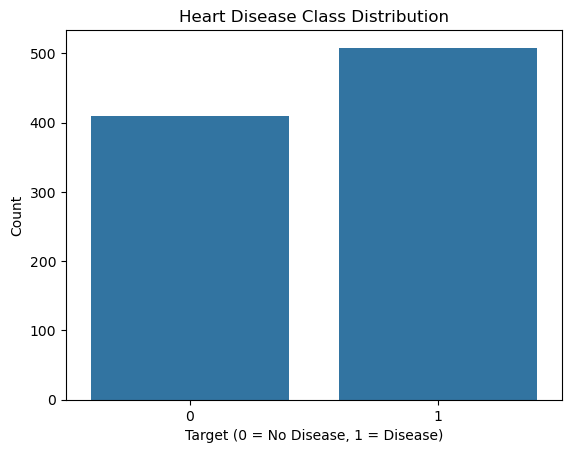

In [31]:
# Target Class Distribution
# To visualize if the dataset is balanced (presence vs. absence of heart disease)
sns.countplot(x='target', data=df)
plt.title('Heart Disease Class Distribution')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

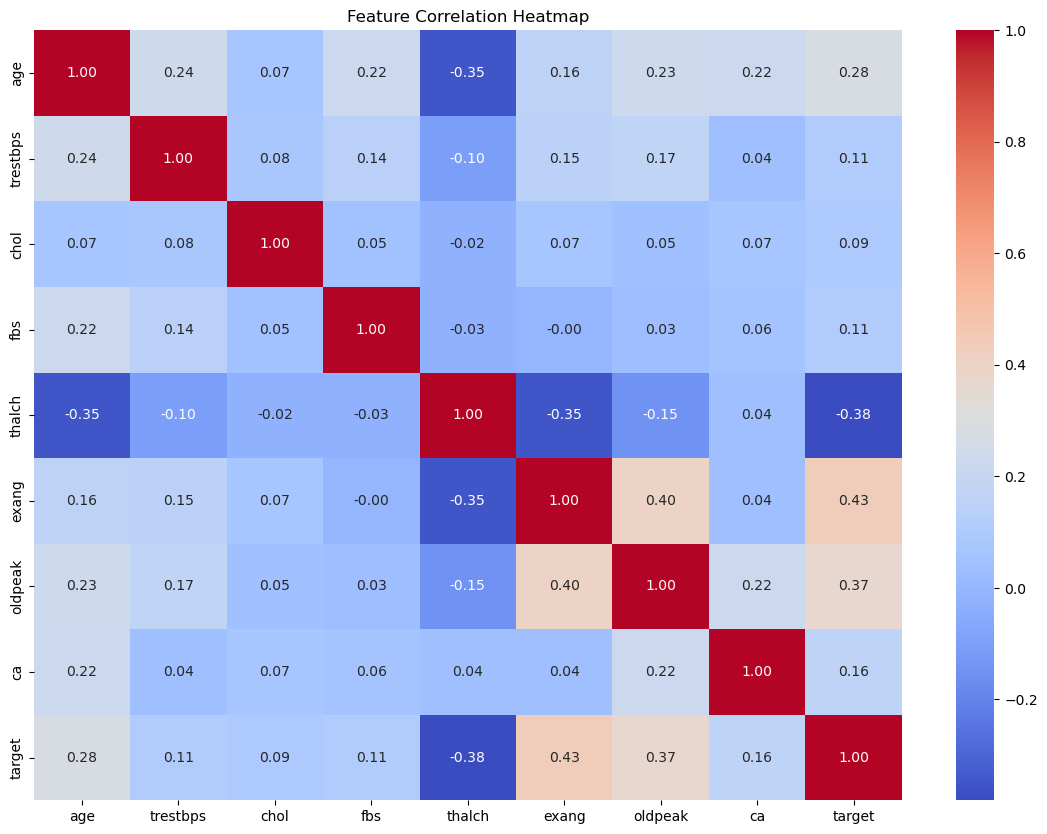

In [32]:
# Heatmap of Feature Correlations

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Draw heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

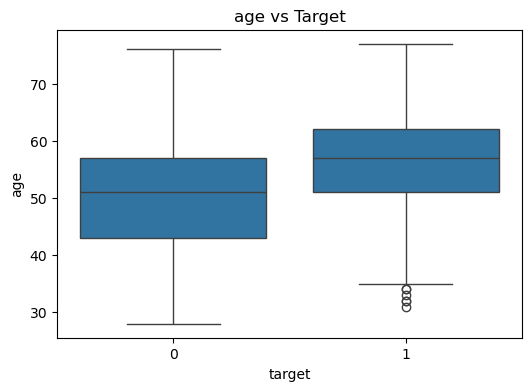

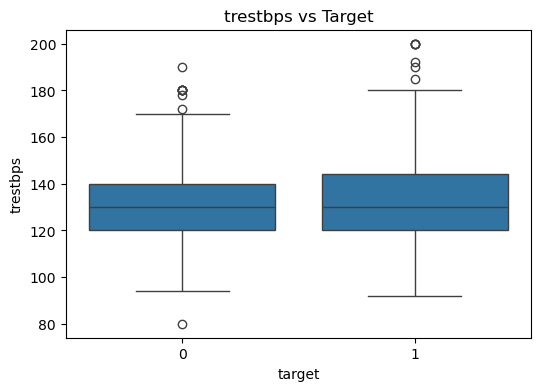

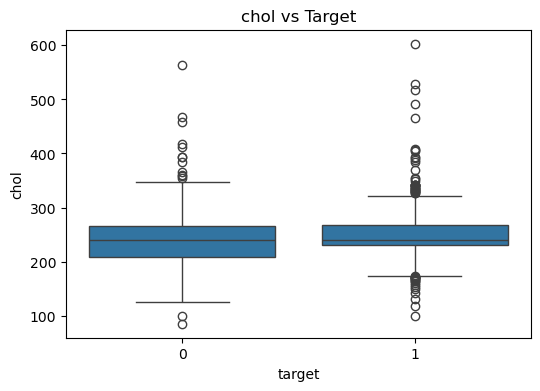

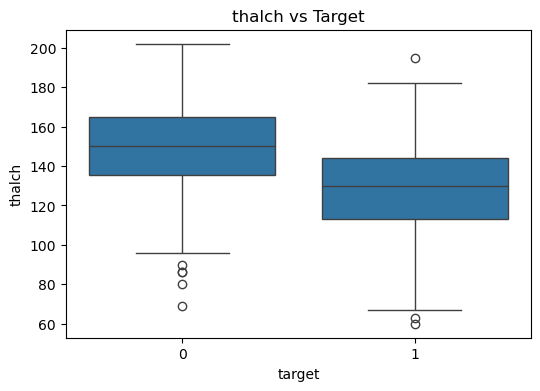

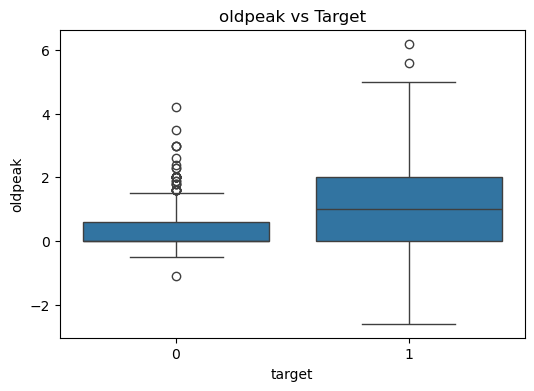

In [33]:
# Boxplots to Spot Outliers
features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Target')
    plt.show()

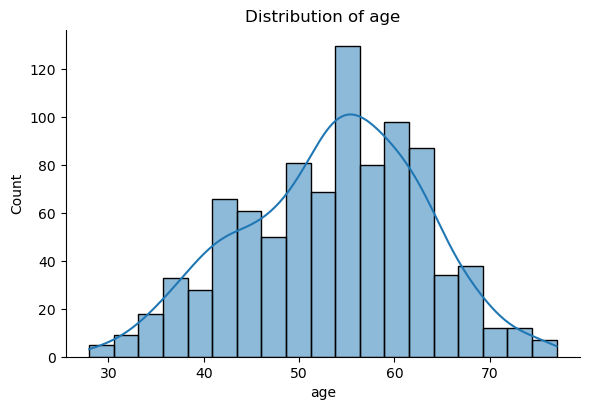

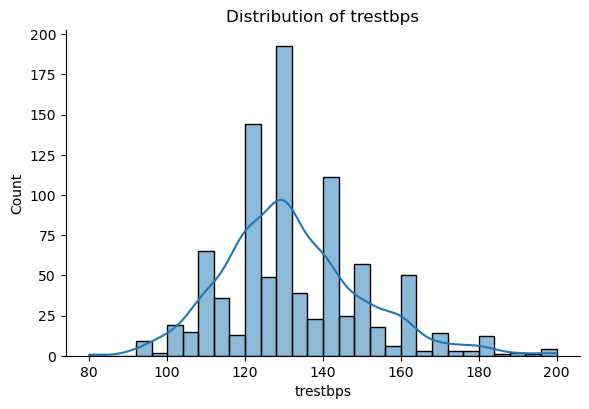

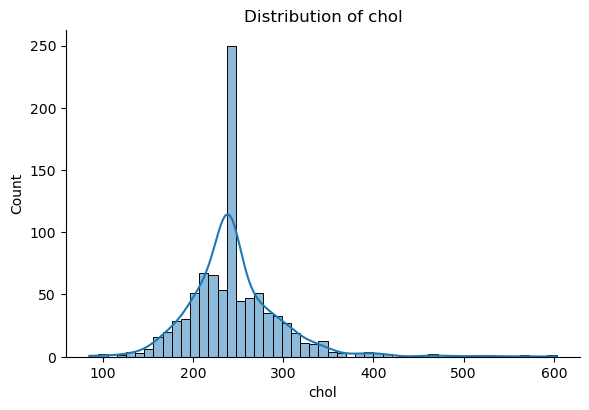

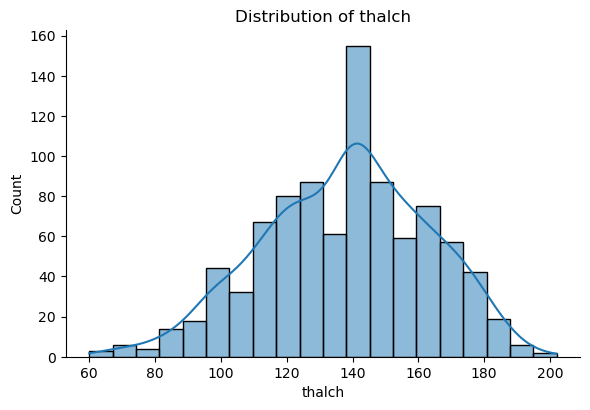

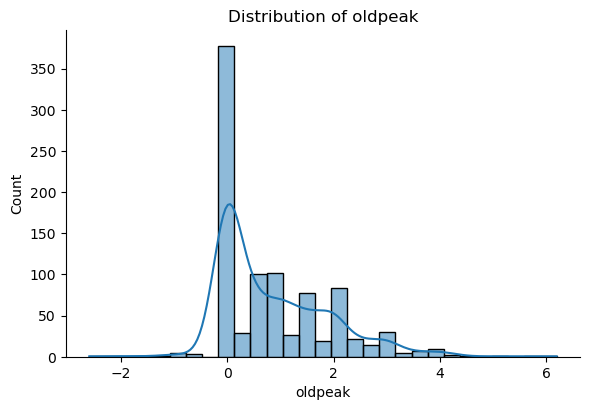

In [34]:
# Histograms / KDE Plots for Distribution

# Checking distribution of each continuous variable

for col in ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']:
    sns.displot(df[col], kde=True, height=4, aspect=1.5)
    plt.title(f'Distribution of {col}')
    plt.show()

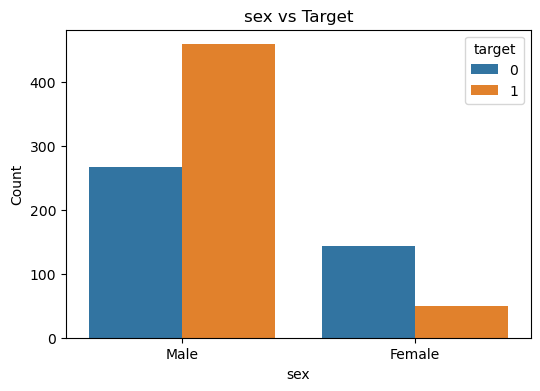

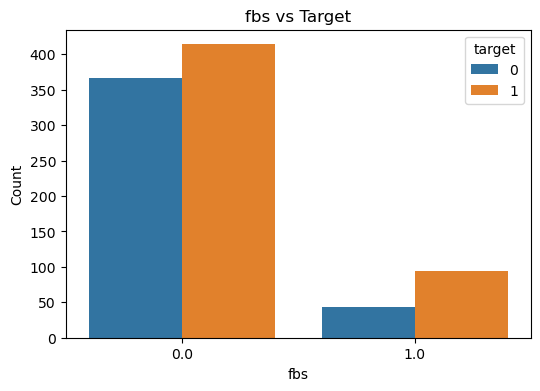

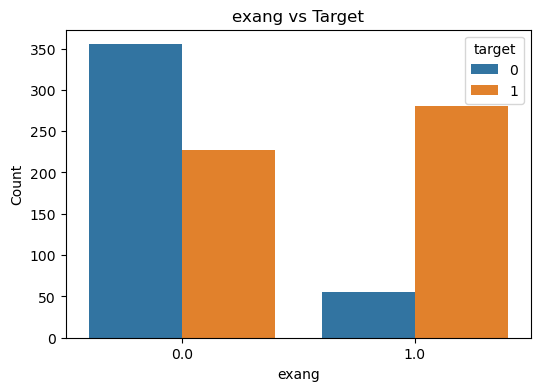

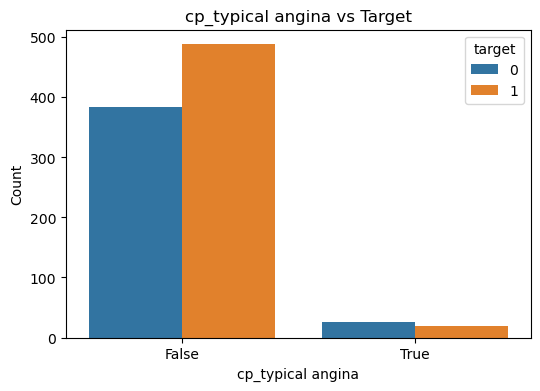

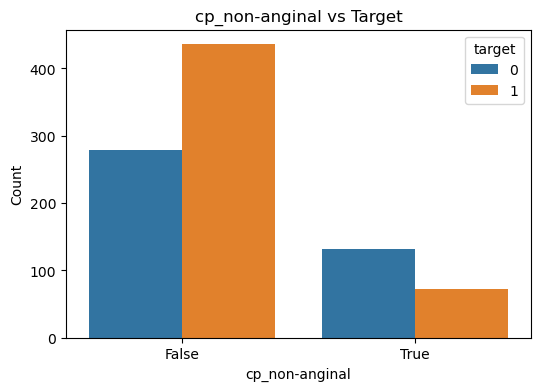

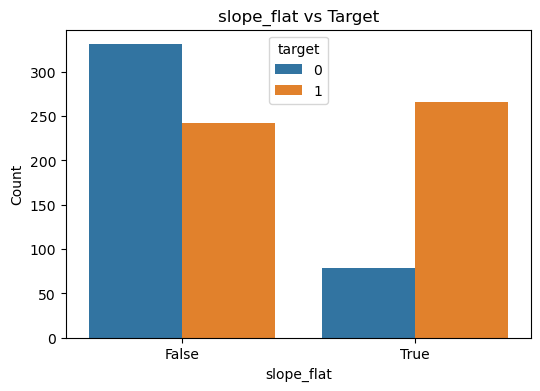

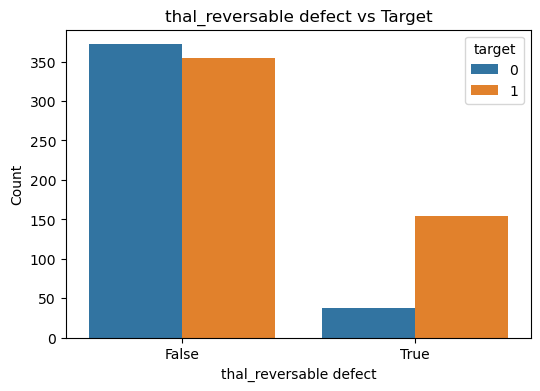

In [35]:
# Countplots for Categorical Features

# Compare binary/categorical features (sex, cp, fbs, exang, slope, thal) across target

cat_features = ['sex', 'fbs', 'exang', 'cp_typical angina', 'cp_non-anginal', 'slope_flat', 'thal_reversable defect']

for feature in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='target', data=df)
    plt.title(f'{feature} vs Target')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.show()

FEATURE ENGINEERING



In [36]:
df.dtypes

age                           int64
sex                          object
trestbps                    float64
chol                        float64
fbs                         float64
thalch                      float64
exang                       float64
oldpeak                     float64
ca                          float64
cp_atypical angina             bool
cp_non-anginal                 bool
cp_typical angina              bool
restecg_normal                 bool
restecg_st-t abnormality       bool
slope_flat                     bool
slope_upsloping                bool
thal_normal                    bool
thal_reversable defect         bool
target                        int64
dtype: object

In [37]:
# Converting 'sex' column to numeric datatype

df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

In [38]:
df.dtypes

age                           int64
sex                           int64
trestbps                    float64
chol                        float64
fbs                         float64
thalch                      float64
exang                       float64
oldpeak                     float64
ca                          float64
cp_atypical angina             bool
cp_non-anginal                 bool
cp_typical angina              bool
restecg_normal                 bool
restecg_st-t abnormality       bool
slope_flat                     bool
slope_upsloping                bool
thal_normal                    bool
thal_reversable defect         bool
target                        int64
dtype: object

In [39]:
# Feature Scaling with StandardScaler 

from sklearn.preprocessing import StandardScaler

# Selecting continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Initialize and apply scaler
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

In [40]:
# Split Data into Train/Test Sets
# step 1
# Define X and y
# X: All input features
# y: The target column, which should be "target" (0 = No heart disease, 1 = Disease)

X = df.drop('target', axis=1)
y = df['target']

In [41]:
# step 2

from sklearn.model_selection import train_test_split

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [42]:
# checking shape after split

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (734, 18) (734,)
Test set: (184, 18) (184,)


Phase 3: Model Development

In [43]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

In [44]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

Evaluating Model Performance

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression Model Evaluation
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Random Forest Model Evaluation
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Logistic Regression
Accuracy: 0.8260869565217391
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        82
           1       0.82      0.87      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184

Random Forest
Accuracy: 0.8260869565217391
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        82
           1       0.82      0.87      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



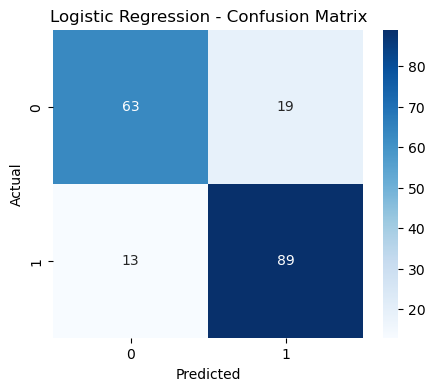

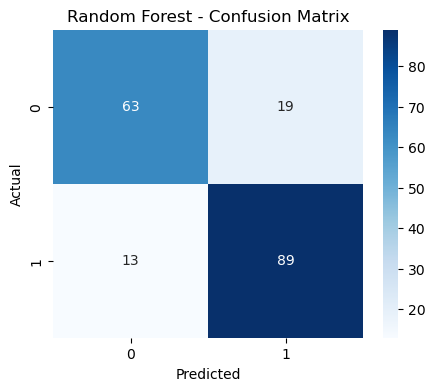

In [46]:
# Ploting confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")


The peformance metrics evaluation of both models shows that they have the same evaluation results

Compare Feature Importance of both models

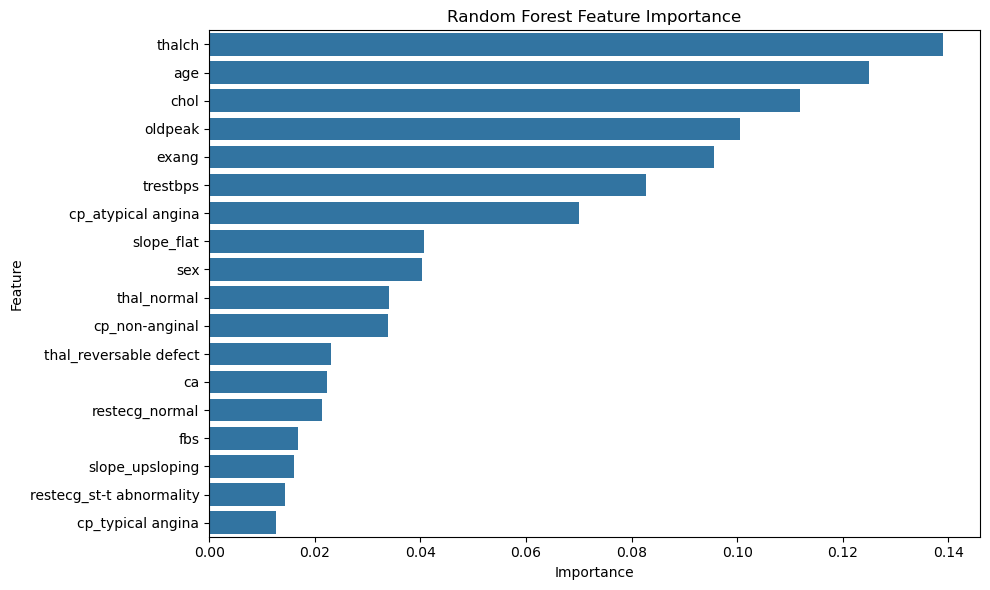

In [47]:
# A: Random Forest Feature Importance

import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

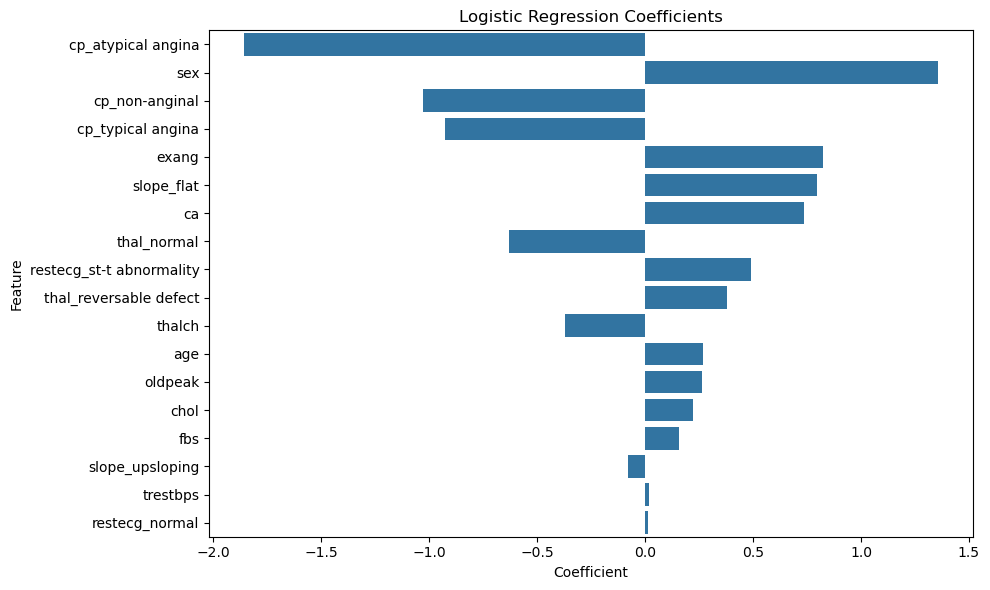

In [48]:
# B: Logistic Regression Coefficients (Feature Weights)

coefficients = lr_model.coef_[0]
features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Logistic Regression Coefficients")
plt.tight_layout()
plt.show()

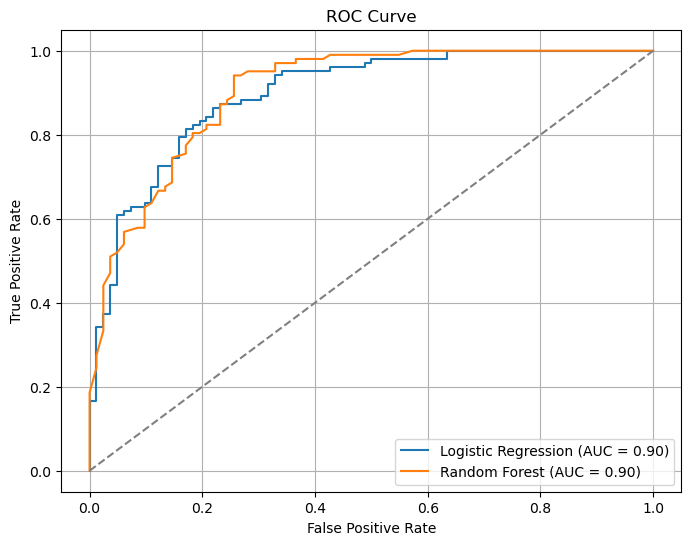

In [49]:
# Plot ROC Curve and Calculate AUC

from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC and AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [50]:
# Trying out Hyperparameter Tuning for Random Forest Model

# Step 1: Importing required tools

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Step 2: Define Parameter Grid

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# Step 3: Initialize Grid Search

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                       # 5-fold cross-validation
    scoring='f1',               # Use F1-score for evaluation
    verbose=1,
    n_jobs=-1                   # Use all cores for faster search
)

# Step 4: Fit Grid Search on the data

grid_search.fit(X_train, y_train)

# Step 5: View Best Parameters and Model

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score from CV:", grid_search.best_score_)


# Step 6 : Evaluate the Tuned Model on Test Set

# Get best model
best_rf = grid_search.best_estimator_

# Predict on test set
y_pred_best = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\segbevurie\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\segbevurie\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\segbevurie\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\segbevurie\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    valid

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 300}
Best F1 Score from CV: 0.8378203799609303
Tuned Random Forest Accuracy: 0.8152173913043478
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        82
           1       0.81      0.87      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



AUC Score: 0.8974


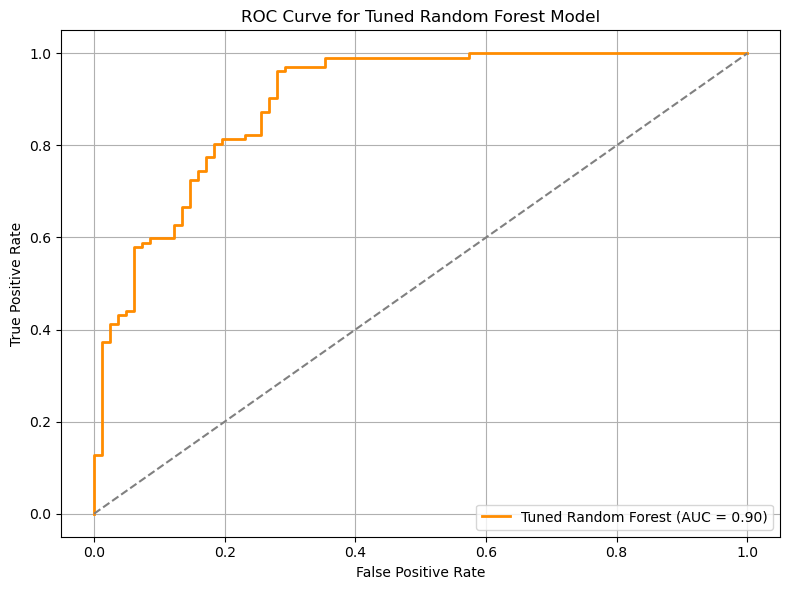

In [51]:
# Plotting the ROC Curve for the Tuned Model

# Step 1: Predict Probabalities 

# Get predicted probabilities for the positive class (1)
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_best = best_rf.predict_proba(X_test)[:, 1]

# Step 2: Calculate ROC Curve and AUC

fpr, tpr, thresholds = roc_curve(y_test, y_prob_best)
auc_score = roc_auc_score(y_test, y_prob_best)

print(f"AUC Score: {auc_score:.4f}")

# Step 3: Plot the ROC Curve

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Tuned Random Forest (AUC = {auc_score:.2f})", color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Random Forest Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
# Saving the Tuned Model for Deployment 

import joblib

# Save the tuned model
joblib.dump(best_rf, 'model.pkl')
print("Tuned Random Forest model saved as model.pkl")


Tuned Random Forest model saved as model.pkl


In [53]:
# In case this model would be used later

# Load the model
loaded_model = joblib.load('model.pkl')

# Predict with it
predictions = loaded_model.predict(X_test)


Phase 4: Model Deployment

In [54]:
X = df.drop('target', axis=1)
print(X.columns.tolist())

['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality', 'slope_flat', 'slope_upsloping', 'thal_normal', 'thal_reversable defect']
